In [35]:
!touch ./app.py

In [32]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [15]:
def getContours(img, cThr=[100,100], showCanny=False, minArea = 0, _filter=0):
    
    #extract ROI
    roi = img[200:400,200:400]
    
    #make a brighter image
    matrix = np.ones(roi.shape) * 2
    img_brighter = np.uint8(cv2.multiply(np.float64(roi),matrix))
    cv2.imwrite("brighter image.png",img_brighter)
    
    cv2.imwrite("ROI.png",roi)
    
    # write original image
    cv2.imwrite("original_img.png",img)
    imgGray = cv2.cvtColor(img_brighter,cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray,(3,3),1)
    cv2.imwrite("blur_img.png",imgBlur)
    imgCanny = cv2.Canny(imgGray, cThr[0], cThr[1])
    
    
    kerneldilate = np.ones((2,2))
    kernelerode = np.ones((1,1))
    imgDial = cv2.dilate(imgCanny, kerneldilate, iterations = 1)
    imgThre = cv2.erode(imgDial, kernelerode, iterations=2)
    
    #if showCanny: cv2.imshow("Canny",imgCanny)
    cv2.imwrite("Dilate.png",imgDial)
    cv2.imwrite("Erode.png",imgThre)
    cv2.imwrite("Canny.png",imgCanny)
    contours, hierachy = cv2.findContours(imgThre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    
    
    finalContours = []
    arealst = []
    perimeter = []
    

    for i in contours:
        area = cv2.contourArea(i)
        arealst.append(area)
        peri = cv2.arcLength(i, True)
        perimeter.append(peri)
        approx = cv2.approxPolyDP(i,0.02*peri,True)
        bbox = cv2.boundingRect(approx)
        if _filter > 0:
            if len(approx) == _filter: 
                finalContours.append(len(approx),area,approx,bbox,i)
            else:
                finalContours.append((len(approx),area,approx,bbox,i))

    #all contours
    cv2.drawContours(img_brighter, contours, -1, (255,0,0),1)
    cv2.imwrite("contours.png",img_brighter)   
    
    return img, finalContours, arealst, perimeter

In [16]:
CONTOUR_THRESHOLD = [100,100]
SHOW_CANNY        = True
MINIMUM_AREA      = 0
FILTER            = 0
DRAW              = True
# PATH
IMAGE_PATH        = "mitochondria test.jpg"

In [17]:
img = cv2.imread(IMAGE_PATH)
    
#img = cv2.resize(img, (0,0), None, 0.1,0.1)
img, finalContours, arealst, perimeter = getContours(img, 
                                     cThr=CONTOUR_THRESHOLD,
                                     showCanny=SHOW_CANNY,
                                     minArea = MINIMUM_AREA,
                                    _filter=FILTER)

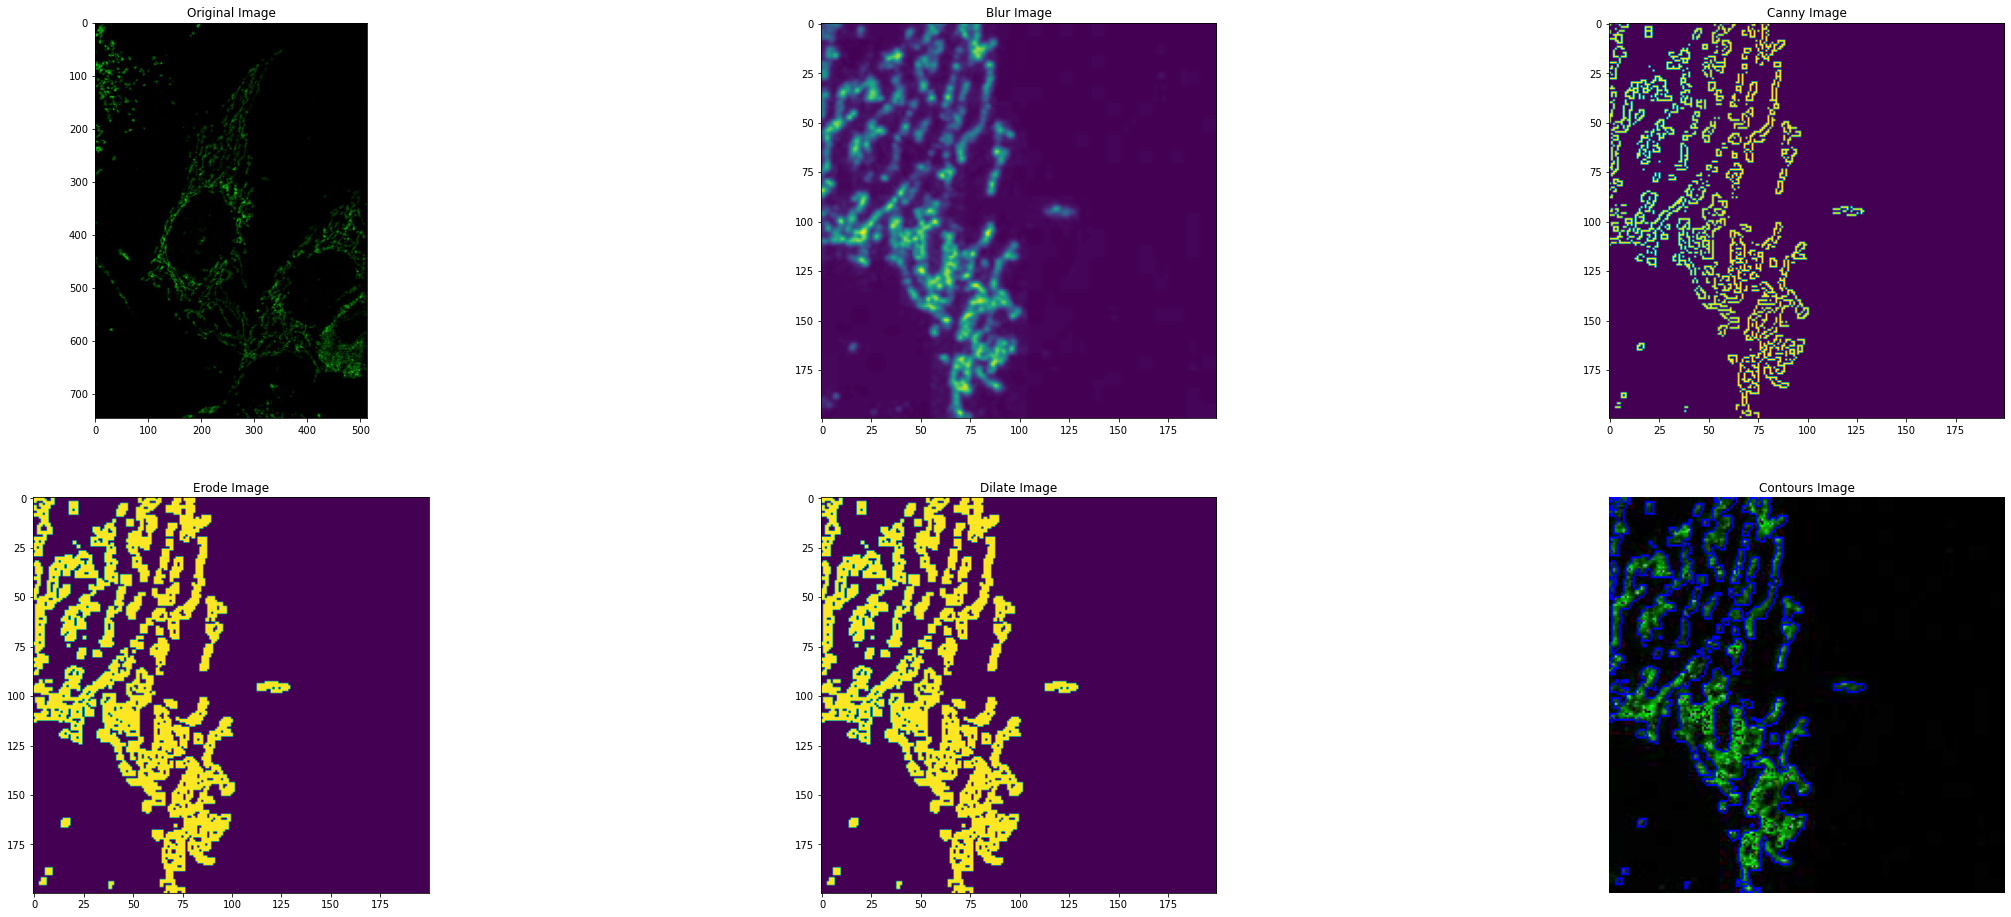

In [18]:
# Canny
img1 = plt.imread('original_img.png')
# Closed Contours
img2 = plt.imread("blur_img.png")
# Canny
img3 = plt.imread("Canny.png")
#Erode
img4 = plt.imread("Erode.png")
#Dilate
img5 = plt.imread("Dilate.png")
# Contours
img6 = plt.imread("contours.png")
# creating objects
fig, axs = plt.subplots(2,3,figsize=(40,16))

axs[0,0].imshow(img1)
axs[0,0].set_title('Original Image')
axs[0,1].imshow(img2)
axs[0,1].set_title('Blur Image')
axs[0,2].imshow(img3)
axs[0,2].set_title('Canny Image')
axs[1,0].imshow(img4)
axs[1,0].set_title('Erode Image')
axs[1,1].imshow(img5)
axs[1,1].set_title('Dilate Image')
axs[1,2].imshow(img6)
axs[1,2].set_title('Contours Image')


plt.axis('off')
plt.show()

In [19]:
print(finalContours)
print(arealst)

[]
[4.5, 7.5, 9.0, 1.0, 15.0, 1305.5, 57.5, 1424.0, 11.5, 732.0, 17.0, 1.0, 85.0, 24.0, 1.0, 10.5, 168.5, 52.5, 147.5, 121.5, 2.0, 66.5, 289.5, 21.5, 9.0, 939.0, 24.0, 24.0, 209.5, 292.5, 142.0]


In [20]:
print(perimeter)

[9.41421353816986, 11.41421353816986, 12.0, 4.0, 14.828427076339722, 438.29141104221344, 39.899494767189026, 455.7056245803833, 13.41421353816986, 307.2792184352875, 16.82842707633972, 4.0, 51.79898953437805, 34.485281229019165, 4.0, 13.41421353816986, 113.01219260692596, 38.72792184352875, 102.5269113779068, 84.04163014888763, 10.828427076339722, 66.38477599620819, 186.46803629398346, 20.242640614509583, 12.0, 481.36247873306274, 19.656854152679443, 20.0, 99.35533845424652, 141.9827550649643, 109.5979790687561]


In [21]:
import math
import pandas as pd

d = {"Area":arealst, "Perimeter":perimeter}
df = pd.DataFrame(d)
df["Circularity"] = (df.Perimeter ** 2)/(4*(math.pi)*df.Area)
# Remove infitiy values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop all NAN values
df = df.dropna(axis=0)
# Only display values with area greater than 10
#df = df[df['Area'] > 10]  
df

,Area,Perimeter,Circularity
0,4.5,9.414214,1.567277
1,7.5,11.414214,1.382359
2,9.0,12.000000,1.273240
3,1.0,4.000000,1.273240
4,15.0,14.828427,1.166512
5,1305.5,438.291411,11.709522
6,57.5,39.899495,2.203216
7,1424.0,455.705625,11.605101
8,11.5,13.414214,1.245153
9,732.0,307.279218,10.264680


<AxesSubplot:xlabel='Circularity', ylabel='Area'>

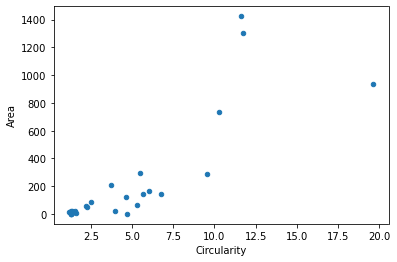

In [31]:
df.plot(kind='scatter',x='Circularity', y='Area')

<AxesSubplot:xlabel='Circularity', ylabel='Perimeter'>

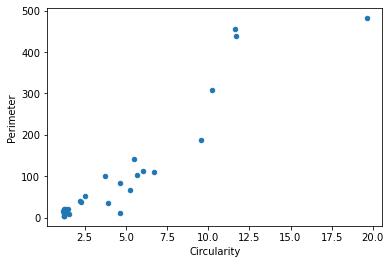

In [30]:
df.plot(kind='scatter',x='Circularity', y='Perimeter')

In [22]:
# arealst.clear()
# perimeter.clear()

In [ ]:
## IQR = interquartile range 
## Value +/- 1.5 IQR 
## IQR = Q1 - Q3 = 9.75 - 158 = 148.25
## min -1.5 * 148, 1.5*148



In [26]:
df.describe()

,Area,Perimeter,Circularity
count,31.000000,31.000000,31.000000
mean,200.500000,94.740699,4.338059
std,375.174493,137.708520,4.306110
min,1.000000,4.000000,1.166512
25%,9.750000,12.707107,1.303409
50%,24.000000,34.485281,2.273418
75%,158.000000,106.062445,5.577833
max,1424.000000,481.362479,19.636723


200.5

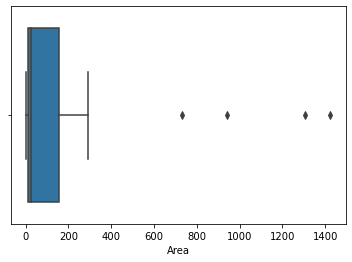

In [25]:
import seaborn as sns

sns.boxplot(x=df["Area"])
df["Area"].mean()


3.0458313314469145

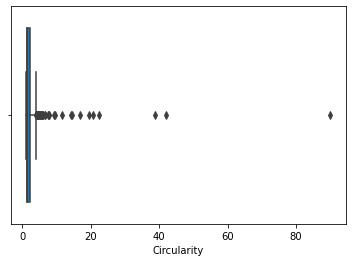

In [1129]:
sns.boxplot(x=df["Circularity"])
df["Circularity"].mean()

(746, 513, 3) uint8 <class 'numpy.ndarray'>


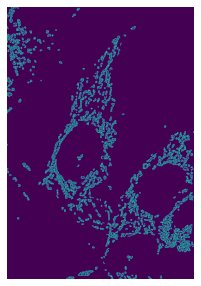

In [172]:
#Read Image
img = plt.imread("Mitochondria test.jpg")

cThr=[100,200]

#Edit Image
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(5,5),1)
imgCanny = cv2.Canny(img, cThr[0], cThr[1])
kernel = np.ones((5,5))
imgDial = cv2.dilate(imgCanny, kernel, iterations = 3)
#imgThre = cv2.erode(imgDial, kernel, iterations=2)
imgThre = imgDial
#if showCanny: cv2.imshow("Canny",imgCanny)
cv2.imwrite("Canny.png",imgCanny)

#Display Image
print(img.shape, img.dtype, type(img))
plt.figure(figsize = (5,5))
plt.imshow(imgCanny)
plt.axis("off")
plt.show()

In [173]:
#Finding Contours 
contours, hierachy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

True

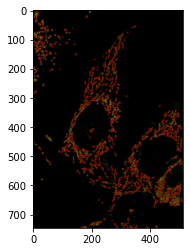

In [174]:
cv2.drawContours(img, contours, -1, (255,0,0), 1)
plt.imshow(img)
cv2.imwrite("Contours.png",img)

#To draw single contours
#cnt = contours[4]
#cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
#cv2.imwrite("Contours.png",img)



Contours


TypeError: '>' not supported between instances of 'type' and 'int'

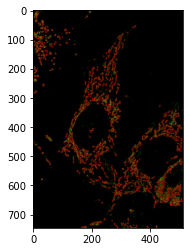

In [175]:
closed_contours = []
for cnt in contours:
   if cv2.isContourConvex(cnt) == True:
      closed_contours.append(cnt)
   else:
      pass
    
cv2.drawContours(img, closed_contours, -1, (255,0,0), 3)
plt.imshow(img)
cv2.imwrite("Closed Contours.png",img)


minArea = 1
finalContours = []
arealst = []
perimeter = []
print("Contours")
for i in closed_contours:
    area = cv2.contourArea(i)
    arealst.append(area)
    peri = cv2.arcLength(i, True)
    perimeter.append(peri)
    approx = cv2.approxPolyDP(i,0.02*peri,True)
    bbox = cv2.boundingRect(approx)
    if filter > 0:
        if len(approx) == filter: 
            finalContours.append(len(approx),area,approx,bbox,i)
    else:
            finalContours.append((len(approx),area,approx,bbox,i))
    
    

In [211]:
print(list(arealst))
import pandas as pd
df = (arealst, columns = ["area"])
print(df)

SyntaxError: invalid syntax (<ipython-input-211-ab0e3b3bb5df>, line 3)

In [212]:
import pandas as pd
df = pd.DataFrame (arealst, columns = ["area"])
print(df)

    area
0    1.0
1    0.5
2    0.5
3    0.5
4    0.5
5    0.5
6    0.5
7    0.5
8    1.0
9    0.5
10   0.5
11   1.0
12   0.5
13   0.5


In [ ]:
circularity = Area

In [213]:
d = {"Area":arealst, "Perimeter":perimeter}

In [214]:
df = pd.DataFrame(d)
df

,Area,Perimeter
0,1.0,4.828427
1,0.5,3.414214
2,0.5,3.414214
3,0.5,3.414214
4,0.5,3.414214
5,0.5,3.414214
6,0.5,3.414214
7,0.5,3.414214
8,1.0,4.828427
9,0.5,3.414214


In [215]:
import math
df["Circularity"] = (df.Perimeter ** 2)/(4*(math.pi)*df.Area)
df

,Area,Perimeter,Circularity
0,1.0,4.828427,1.855246
1,0.5,3.414214,1.855246
2,0.5,3.414214,1.855246
3,0.5,3.414214,1.855246
4,0.5,3.414214,1.855246
5,0.5,3.414214,1.855246
6,0.5,3.414214,1.855246
7,0.5,3.414214,1.855246
8,1.0,4.828427,1.855246
9,0.5,3.414214,1.855246


In [216]:
print(list(perimeter))

[4.828427076339722, 3.414213538169861, 3.414213538169861, 3.414213538169861, 3.414213538169861, 3.414213538169861, 3.414213538169861, 3.414213538169861, 4.828427076339722, 3.414213538169861, 3.414213538169861, 4.828427076339722, 3.414213538169861, 3.414213538169861]


In [181]:
cv2.imshow("Ass",img)
cv2.waitKey(1)

-1

In [34]:
!pip3 install streamlit

  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19567 sha256=a218b4c4c8c7a84ce01fd66940ee83b3234f853bdc3b57735fa9d7c142aca5ee
  Stored in directory: c:\users\maxje\appdata\local\pip\cache\wheels\19\09\72\3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Using cached streamlit-1.14.1-py2.py3-none-any.whl (9.2 MB)
  Using cached rich-12.6.0-py3-none-any.whl (237 kB)
  Using cached GitPython-3.1.29-py3-none-any.whl (182 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached tzlocal-4.2-py3-none-any.whl (19 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
  Using cached validators-0.20.0-py3-none-any.whl
  Using cached cachetools-5.2.0-py3-no